In [1]:
cols.subtypes=c(alpha1='darkred',alpha2='lightpink',
               beta1='darkgreen',beta2='lightgreen',
               gamma1='orange',gamma2='gold')

In [3]:
require(tidyverse)
require(data.table)
require(ggplot2)
require(chromVAR)
require(SummarizedExperiment)
require(RColorBrewer)
require(pheatmap)
require(ggdendro)
require(extrafont)  # fonts 
# https://blog.revolutionanalytics.com/2012/09/how-to-use-your-favorite-fonts-in-r-charts.html
suppressMessages(loadfonts())
require(ggthemes)
# #https://rpubs.com/Koundy/71792 theme_Publication
require(ComplexHeatmap)
cols.hm.avg.tf <- colorRampPalette(c(rgb(249, 249, 212, maxColorValue = 255), rgb(60, 
    181, 195, maxColorValue = 255), rgb(30, 35, 86, maxColorValue = 255)), space = "Lab")

require(ggpubr)

theme_pubr<- function (base_size = 11, base_family = "Arial") 
{
    theme_foundation() + theme(line = element_line(colour = "black", 
        lineend = "round", linetype = "solid"), rect = element_rect(fill = "white", 
        colour = "black", linetype = "solid"), text = element_text(colour = "black", 
        face = "plain", family = base_family, size = base_size, 
        vjust = 0.5, hjust = 0.5, lineheight = 0.5), panel.background = element_blank(), 
        plot.background = element_blank(), panel.border = element_rect(colour = "black", 
            fill = NA), panel.grid = element_blank(), strip.background = element_rect(colour = NA), 
        legend.key = element_rect(colour = NA), title = element_text(size = rel(1)), 
        plot.title = element_text(size = rel(1.2), face = "bold"), 
        strip.text = element_text(), axis.ticks.length = unit(1, 
    "mm"))
}

## 1. chromVar

### 1.1 select variable motifs

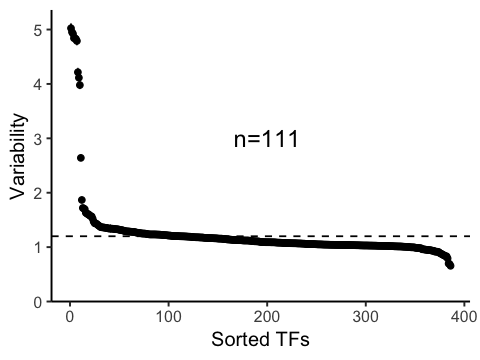

In [72]:
options(repr.plot.width=4, repr.plot.height=3)
variability <- read.csv("../dat/output.jaspar.var.res.csv",row.names=1)
plotVariability(variability, use_plotly = FALSE,labels = "",)+
    geom_hline(yintercept = 1.2,linetype=2)+
    annotate("text",x=200,y=3,
             label=paste0('n=',nrow(subset(variability,variability>=1.2))),
            family = "Arial",size=5)+
theme(text = element_text(family = "Arial"))
ggsave(filename = "fig_s1.select_varible_motifs.pdf",width = 4,height = 3,useDingbats=F)

#### 1.1.1 plot heatmap + dendrogram

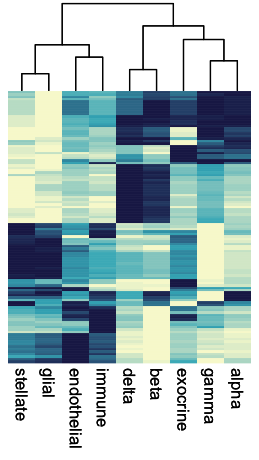

In [4]:
options(repr.plot.width = 1.08 * 2, repr.plot.height = 3.84)

pd.list <- readRDS("../dat/figdata/Fig1E.Rdata")

p<-pheatmap(pd.list$pd, scale = "none", cluster_rows = F, legend = F, show_rownames = F, 
    show_colnames = T, cluster_cols = T, border_color = NA, color = cols.hm.avg.tf(30))
print(p)


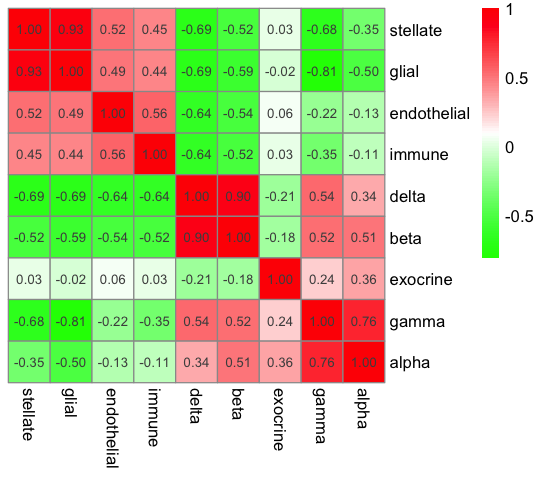

In [17]:
options(repr.plot.width = 4.5, repr.plot.height = 4)
cor.mat <- cor(pd.list$pd)
pheatmap(cor.mat[p$tree_col$order, p$tree_col$order], scale = "none", display_numbers = T, 
    cluster_rows = F, cluster_cols = F, color = colorRampPalette(c("green", "white", 
        "red"))(100))

In [30]:
head(pd.list$pd %>% rownames_to_column("motif") %>% gather(2:10, key = "celltype", 
    value = "avgZ"), 1)

motif,celltype,avgZ
FOXC1,stellate,0.329117


In [34]:
res.motifs <- lapply(colnames(pd.list$pd), function(ct) pd.list$pd %>% rownames_to_column("motif") %>% 
    gather(2:10, key = "celltype", value = "avgZ") %>% filter(celltype == ct) %>% 
    top_n(1) %>% pull(motif))
names(res.motifs) <- colnames(pd.list$pd)

Selecting by avgZ
Selecting by avgZ
Selecting by avgZ
Selecting by avgZ
Selecting by avgZ
Selecting by avgZ
Selecting by avgZ
Selecting by avgZ
Selecting by avgZ


In [35]:
res.motifs

$stellate
 [1] "TFEB"        "TFEC"        "TFE3"        "USF2"        "USF1"       
 [6] "ATF7"        "JDP2(var.2)" "BATF3"       "NFE2"        "FOSL2"      
[11] "JUNB"        "FOS"         "JUND"        "JDP2"        "FOSL1"      
[16] "MAF::NFE2"   "MEF2D"       "MEF2B"      

$glial
[1] "JUND(var.2)" "JUN"         "ATF4"        "JUN(var.2)"  "FOS::JUN"   
[6] "BATF::JUN"   "STAT3"      

$endothelial
 [1] "STAT1" "ELF1"  "FLI1"  "ETS1"  "ELK3"  "ERG"   "ERF"   "ETV4"  "FEV"  
[10] "ELK1"  "ELK4"  "ETV2"  "NFYA"  "NFYB" 

$immune
 [1] "CEBPA" "ELF4"  "ETV6"  "EHF"   "ELF3"  "ELF5"  "IRF9"  "IRF8"  "IRF2" 
[10] "SPIC"  "SPI1" 

$exocrine
 [1] "ZEB1"  "GATA2" "GATA3" "GATA5" "HNF4G" "HNF1A" "HNF1B" "REL"   "RELA" 
[10] "TEAD3"

$gamma
 [1] "FOXC2" "FOXA1" "FOXL1" "FOXI1" "FOXD2" "FOXO4" "FOXO6" "FOXP3" "RFX2" 
[10] "RFX3"  "RFX4"  "RFX5"  "CTCF" 

$alpha
 [1] "FOXC1"       "FOXB1"       "TCF3"        "TCF4"        "ID4"        
 [6] "NEUROG2"     "GATA1::TAL1" "MAFK"        "MAFF"        "MAFG"       
[11] "NRL"        

$delta
 [1] "SNAI2"      "MSC"        "TAL1::TCF3" "NKX6-1"     "NKX6-2"    
 [6] "MEOX1"      "EVX2"       "POU6F2"     "EMX2"       "EMX1"      
[11] "LBX1"       "LHX9"       "ISX"        "RAX2"       "GBX1"      
[16] "GBX2"       "DLX6"       "LHX2"       "LHX6"       "GSX1"      
[21] "PDX1"       "PRRX1"      "SHOX"       "PAX4"       "NOTO"      
[26] "VAX2"       "VAX1"      

$beta
[1] "MSC"

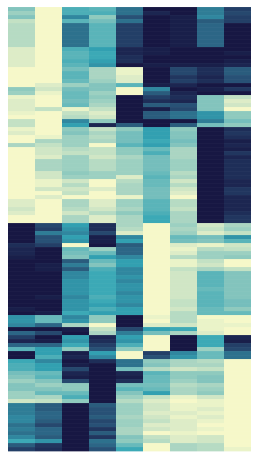

In [4]:
options(repr.plot.width = 1.08 * 2, repr.plot.height = 3.84)

pd.list <- readRDS("../dat/figdata/Fig1E.Rdata")
# pheatmap(pd.list$pd, scale = "none", cluster_rows = F, legend = F, cluster_cols = F, 
 #   clustering_callback = callback, clustering_method = "ward.D2", treeheight_row = 0, 
#    show_rownames = T, fontsize_row = 5, border_color = NA, color = cols.hm.avg.tf(30))
p<-pheatmap(pd.list$pd, scale = "none", cluster_rows = F, legend = F, show_rownames = F, 
    show_colnames = F, cluster_cols = F, border_color = NA, color = cols.hm.avg.tf(30))
print(p)
pdf(file = "/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-05_figs/fig1_E.heatmap.pdf", 
    height = 384/72, width = 108/72)
print(p)
dev.off()
write.csv(pd.list$pd[,9:1],'/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-05_figs/fig_1E.motif_heatmap.csv')



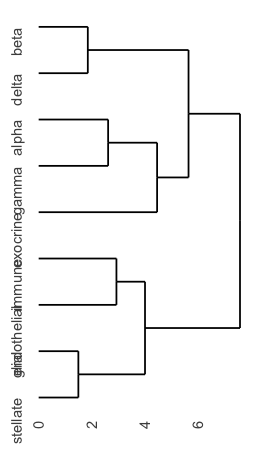

In [18]:
p <- ggdendrogram(pd.list$hc, size = 2) + coord_flip()
p
ggsave(plot = p + theme_dendro(), filename = "/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-05_figs/fig1_E.dendro.pdf", 
    width = 36/72, height = 108/72)

### 1.2 Select subtype variable motifs

In [3]:
ttest.res.pd <- fread("../dat/ttest.res.csv")
head(ttest.res.pd)

motif,mean.x,mean.y,pval,FDR,delta,celltype,selected
TAL1::TCF3,0.4370173,-1.2149997,7.024690e-294,2.259609e-292,1.652017,alpha,TRUE
FOXA1,0.7863176,-0.8104455,5.191431e-166,6.909974e-165,1.596763,alpha,TRUE
NRL,0.8438468,-0.7007903,5.813246e-286,1.726087e-284,1.544637,alpha,TRUE
GATA2,1.6837458,0.2464757,1.538030e-235,3.492233e-234,1.437270,alpha,TRUE
MSC,0.3263068,-1.0008402,5.939102e-231,1.273607e-229,1.327147,alpha,TRUE
GATA3,1.6811623,0.3688956,5.904089e-195,9.908602e-194,1.312267,alpha,TRUE


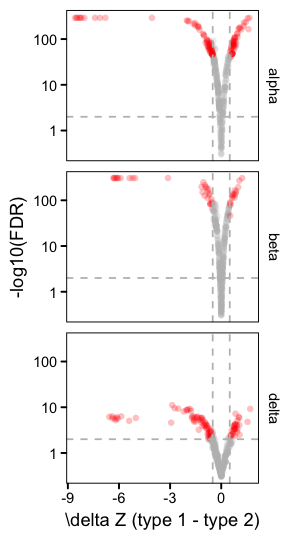

In [4]:
options(repr.plot.width = 2.5, repr.plot.height = 4.5)

ttest.res.pd <- fread("../dat/ttest.res.csv") %>% group_by(celltype) %>% mutate(min.FDR = min(FDR[FDR != 
    0]), FDR.bak = FDR) %>% mutate(FDR = ifelse(FDR == 0, min.FDR, FDR)) %>% mutate(type = ifelse(delta > 
    0, 1, 2)) %>% mutate(type = paste0(celltype, type))


plt.volcano.ttest <- ggplot(ttest.res.pd, aes(delta, -log10(FDR))) + geom_point(aes(color = selected), 
    shape = ifelse(ttest.res.pd$FDR < ttest.res.pd$min.FDR, 17, 16), alpha = 0.25) + 
    theme_pubr() + geom_hline(yintercept = 2, linetype = 2, color = "grey") + geom_vline(xintercept = c(-0.5, 
    0.5), linetype = 2, color = "grey") + scale_y_log10() + scale_color_manual(values = c("grey", 
    "red")) + theme(legend.position = "none") + facet_grid(celltype ~ .) + xlab("\\delta Z (type 1 - type 2)")

print(plt.volcano.ttest)

# ggsave(filename = '/Users/frank/Dropbox
# (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/sfigs/fig_s2.select_subtype_motifs.pdf',
# width = 2.5, height = 4.5, useDingbats = F)

### 1.3 plot motif heatmap for alpha and beta cells

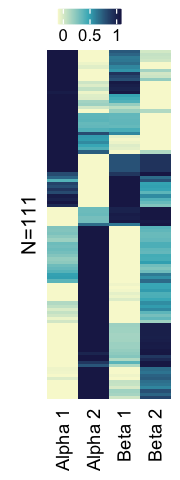

In [11]:
options(repr.plot.width = 1.5, repr.plot.height = 4)

# calc_varability_heatmap_on_subtypes_ab.R
pd.fig_2B.motif_heatmap_ab <- read.csv("~/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs//fig2/fig_2B.motif_heatmap_ab.csv", 
    row.names = 1)
colnames(pd.fig_2B.motif_heatmap_ab) <- c("Alpha 1", "Alpha 2", "Beta 1", "Beta 2")
ht <- Heatmap(pd.fig_2B.motif_heatmap_ab, col = cols.hm.avg.tf(30), cluster_columns = F, 
    cluster_rows = F, row_title = paste0("N=", nrow(pd.fig_2B.motif_heatmap_ab)), 
    row_title_side = "left", row_title_gp = gpar(fontsize = 12), show_column_names = T, 
    show_row_names = F, column_names_gp = gpar(fontsize = 11), name = "", show_heatmap_legend = T, 
    heatmap_legend_param = list(at = c(0, 0.5, 1), title_gp = gpar(fontsize = 9), 
        grid_border = "black", color_bar = "continuous", grid_height = unit(3, "mm"), 
        legend_direction = "horizontal"), show_row_dend = F, combined_name_fun = NULL)
draw(ht, heatmap_legend_side = "top")
# pdf('fig_2B.motif_heatmap_ab.pdf',height = 4,width = 2,family = 'Arial')
# draw(ht, heatmap_legend_side = 'top') dev.off()

### 1.4 violin plot for motif (between celltypes)

In [ ]:


boxplot(x,horizontal=TRUE,axes=FALSE,

Warning message:
“Ignoring unknown aesthetics: xmin, xmax, annotations, y_position”Warning message:
“Ignoring unknown aesthetics: xmin, xmax, annotations, y_position”

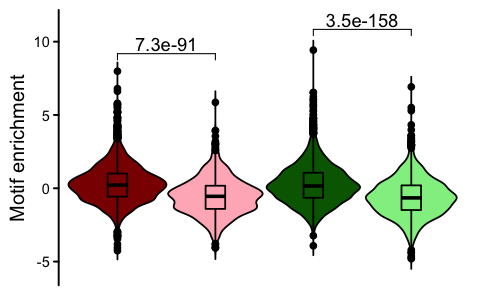

Warning message:
“Ignoring unknown aesthetics: xmin, xmax, annotations, y_position”

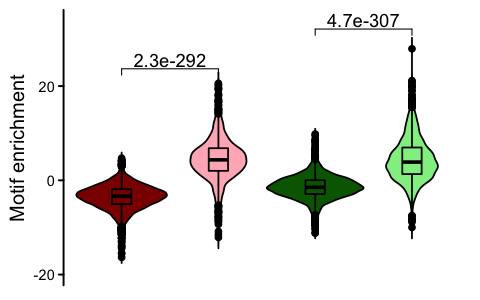

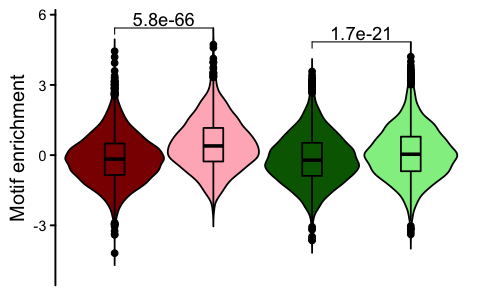

In [49]:
pd.fig_2B.motif_violin_ab <- fread(file = "../dat/fig_2B.motif_violin_ab.csv") %>% 
    mutate(cluster = factor(cluster, levels = c("Alpha 1", "Alpha 2", "Beta 1", "Beta 2")))

options(repr.plot.width = 4, repr.plot.height = 2.5)
fun.plotMofifGG <- function(m) {
    pd <- pd.fig_2B.motif_violin_ab %>% filter(Motif.name == m)
    pd.m <- pd %>% ungroup() %>% group_by(cluster) %>% summarise(mmin = min(zval), 
        mmax = max(zval)) %>% as.data.frame() %>% column_to_rownames("cluster")
    mmin <- min(pd$zval)
    mmax <- max(pd$zval)
    ggviolin(pd, x = "cluster", y = "zval", size = 0.5, shape = 16, add = "boxplot", 
        add.params = list(size = 0.5), fill = "cluster", ylab = "Motif enrichment") + 
        stat_pvalue_manual(data = ttest.res.pd %>% filter(motif == m) %>% ungroup() %>% 
            mutate(group1 = c("Alpha 1", "Beta 1"), font.label = list(size = 10), 
                group2 = c("Alpha 2", "Beta 2"), FDR = signif(FDR, 2), label.size = 10, 
                y.position = c(max(pd.m[c("Alpha 1", "Alpha 2"), "mmax"]) * 1.15, 
                  max(pd.m[c("Beta 1", "Beta 2"), "mmax"]) * 1.15)), label = "FDR", 
            xmin = "group1", xmax = "group2", y.position = "y.position") + coord_cartesian(expand = T, 
        ylim = c(mmin * 1.2, mmax * 1.2)) + theme_pubr() + theme(legend.position = "none", 
        axis.text.x = element_blank(), axis.title.x = element_blank(), title = element_text(size = 12, 
            hjust = 0.5), text = element_text(family = "Arial"), panel.border = element_rect(colour = NA), 
        axis.ticks.x = element_blank(), axis.line.x = element_blank(), axis.line = element_line(colour = "black")) + 
        scale_fill_manual(values = c("darkred", "lightpink", "darkgreen", "lightgreen"))
}

fun.plotMofifGG("RFX3")
ggsave(filename = "/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2B.motif_violin_ab_RFX3.pdf", 
    width = 2.8319, height = 1.5, useDingbats = F)
fun.plotMofifGG("FOS::JUN")
ggsave(filename = "/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2B.motif_violin_ab_FOS_JUN.pdf", 
    width = 2.8319, height = 1.5, useDingbats = F)

fun.plotMofifGG("XBP1")
ggsave(filename = "/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2B.motif_violin_ab_XBP1.pdf", 
    width = 2.8319, height = 1.5, useDingbats = F)

### 1.5 UMAP scatter

In [14]:
#project_jaspar_chromVAR_res_to_umap_subcelltype_ab.R
pd.fig2.umap<- fread(file = "../dat/output.umap.ab.filtered.csv")
input.chromVar.res.list <- readRDS(file = "../dat/output.jaspar.dev.res.Rdata")
input.chromVar.jaspar.z <- assays(input.chromVar.res.list$dev)$z


input.chromVar.jaspar.z.scale <- input.chromVar.jaspar.z
input.chromVar.jaspar.z.scale[input.chromVar.jaspar.z.scale>4] <- 4
input.chromVar.jaspar.z.scale[input.chromVar.jaspar.z.scale< -4] <- -4


In [15]:
dim(input.chromVar.jaspar.z.scale)

[1]   386 14748

In [7]:
fun.plot.project.motif <- function(motif, input.chromVar.z = input.chromVar.jaspar.z.scale, 
    umap.res = pd.fig2.umap, rescale = F, cls = rev(brewer.pal(n = 11, "RdBu")), 
    bks = c(-5, 0, 5)) {
    require(scales)
    
    motif.idx <- grep(motif, rownames(input.chromVar.z))
    if (length(motif.idx) == 0) {
        message(motif, " is not found!")
        return()
    }
    
    motif.z <- input.chromVar.z[motif.idx[1], ]
    if (rescale) {
        sc <- max(abs(quantile(motif.z, probs = c(0.05, 0.95))))
        motif.z[motif.z > sc] <- sc
        motif.z[motif.z < -sc] <- -sc
    }
    
    motif.z <- motif.z %>% as.data.frame() %>% rownames_to_column("barcodes")
    colnames(motif.z)[2] <- "zval"
    
    tmp <- umap.res %>% right_join(motif.z)
    
    p.default.cluster.motif <- ggplot(tmp, aes(UMAP1, UMAP2)) + geom_point(aes(colour = zval), 
        size = 0.2, shape = 16) + ggtitle(rownames(input.chromVar.jaspar.z)[motif.idx]) + 
        scale_color_gradientn(colours = cls, breaks = bks) + theme_pubr() + theme(text = element_blank(), 
        axis.ticks = element_blank(), legend.position = c(0.2, 0.9), legend.direction = "horizontal", 
        legend.key.width = unit(2, "mm"), legend.key.height = unit(0.1, "inches"), 
        legend.text = element_text(size = 10,family = "Arial"), legend.background = element_rect(fill = "transparent", 
            colour = "transparent"), plot.margin = unit(c(1, 1, -1, -1), "mm"))
    
    p.default.cluster.motif
}

Joining, by = "barcodes"
Joining, by = "barcodes"
Joining, by = "barcodes"
Warning message:
“Removed 2104 rows containing missing values (geom_point).”Warning message:
“Removed 2104 rows containing missing values (geom_point).”Warning message:
“Removed 2104 rows containing missing values (geom_point).”Warning message:
“Removed 2104 rows containing missing values (geom_point).”Warning message:
“Removed 2104 rows containing missing values (geom_point).”Warning message:
“Removed 2104 rows containing missing values (geom_point).”

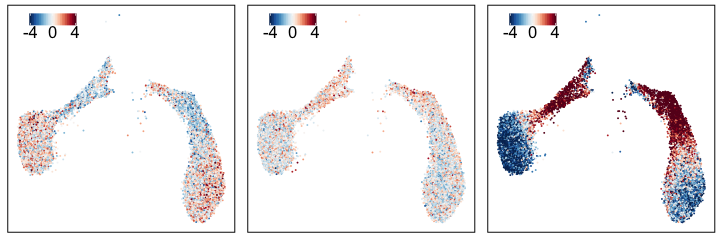

In [8]:
options(repr.plot.width = 6, repr.plot.height = 2)

ps <- lapply(c("RFX3", "XBP1", "FOS::JUN"), fun.plot.project.motif, bks = c(-4, 0, 
    4))
names(ps) <- c("RFX3", "XBP1", "FOS::JUN")
ggarrange(plotlist = ps, ncol = 3)

for (i in names(ps)) ggsave(ps[[i]], filename = paste0("/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2B.motif_umap_ab_", i, 
    ".pdf"), width = 2, height = 2, , useDingbats = F)

### 1.6 Motif pseduostates

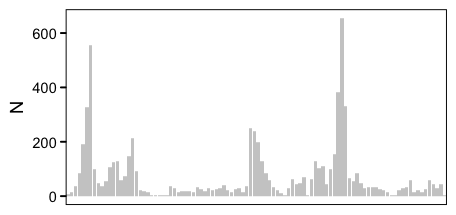

In [8]:
## beta ps bin
ps.bin.dat.sum <- fread('../dat/figdata/ps.bin.dat.sum.csv')
options(repr.plot.width = 548.276/72/2, repr.plot.height = 258.924/72/2)

p <- ggplot(ps.bin.dat.sum %>% filter(celltype == "beta") %>% droplevels(), aes(ps_bin, 
    N)) + geom_bar(stat = "identity", fill = "grey80") + theme_pubr() + theme(axis.title.x = element_blank()) + 
    scale_x_discrete(breaks = c(0, 50, 100))
print(p)
#ggsave(p + theme(axis.title = element_blank(), axis.text = element_blank()), filename = "/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-05_figs/fig2D_beta_ps_histogram.pdf", 
#    width = 176/72, height = 36/72)

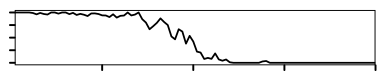

In [85]:
options(repr.plot.width = 154.196/72 * 1.5, repr.plot.height = 6/72 * 8)
pd <- ps.bin.dat.sum %>% filter(celltype == "beta") %>% droplevels() %>% ungroup()%>%
    mutate(ps_bin.idx=as.numeric(factor(ps_bin,levels=ps_bin)))
#head(pd)
ggplot(pd) + geom_line(aes(ps_bin.idx, frac)) + theme_pubr()+coord_cartesian(expand = F)+
ylim(-0.05,1.05)+theme(text = element_blank())
ggsave(paste0("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/fig2D_beta_ps_frac.pdf"),width=154.196/72 * 1.5,
     height=6/72 * 8,useDingbats = F)

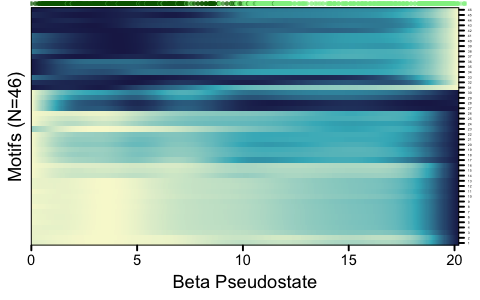

In [11]:
pd.fig_2.motif.beta.pesudostate <- readRDS("../dat/figdata/fig_2.motif.beta.pesudostate.hm.Rds")


pd <- pd.fig_2.motif.beta.pesudostate$pd %>% as.data.frame() %>% rownames_to_column("motif") %>% 
    gather(key = "ps.idx", value = "zval", -1) %>% mutate(ps = (as.numeric(ps.idx) - 
    1) * 0.05, motif = factor(motif, levels = rev(rownames(pd.fig_2.motif.beta.pesudostate$pd)))) %>% 
    select(-ps.idx)
l <- length(levels(pd$motif))

p1 <- ggplot(pd, aes(ps, as.numeric(motif))) + geom_tile(aes(fill = zval)) + theme_pubr() + 
    coord_cartesian(expand = F) + theme(axis.ticks.length = unit(1, "mm"), legend.position = "none", 
    axis.text.y = element_text(size = 2), plot.margin = margin(0.5, 5, 5, 5, "pt")) + scale_fill_gradientn(colours = colorRampPalette(c(rgb(249, 
    249, 212, maxColorValue = 255), rgb(60, 181, 195, maxColorValue = 255), rgb(30, 
    35, 86, maxColorValue = 255)), space = "Lab")(50)) + scale_y_continuous(breaks = c(0, 
    l + 1), sec.axis = sec_axis(~., breaks = 1:l)) + ylab(paste0("Motifs (N=", l, 
    ")")) + xlab("Beta Pseudostate")


p2 <- ggplot(pd.fig_2.motif.beta.pesudostate$pd.anno, aes(pt, 1)) + geom_point(shape = 16, 
    size = 1, aes(color = subtype), alpha = 0.5) + coord_cartesian(expand = F) + 
    theme_void() + ylab("") + theme(legend.position = "none", plot.margin = margin(0.5, 
    8, 0, 5, "pt"), axis.title.y = element_text(size = 11, vjust = 1, angle = 90, 
    colour = "black", face = "plain", family = "Arial", hjust = 0.5, lineheight = 0.5)) + 
    scale_color_manual(values = c("darkgreen", "lightgreen"))


options(repr.plot.width = 4, repr.plot.height = 2.5)
ggarrange(p2, p1, nrow = 2, heights = c(1, l))

#ggsave( filename = '/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2B.motif_beta_ps_idxlabel.pdf', width = 4, height = 2.5,
# useDingbats = F)
#fwrite(data.frame(idx=1:l,motif=levels(pd$motif)),'/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2B.motif_beta_ps_idxlabel.csv')
#write.csv(pd.fig_2.motif.beta.pesudostate$pd,"../dat/figdata/3.motif.beta.ps.step0.05.csv")

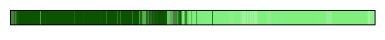

In [53]:
options(repr.plot.width = 154.196/72 * 1.5, repr.plot.height = 6/72 * 4)

ggplot(pd.fig_2.motif.beta.pesudostate$pd.anno) + geom_rect(aes(xmin = pt - 0.1, 
    xmax = pt + 0.1, fill = subtype), ymin = 0, ymax = 1, alpha = 0.5) + theme_pubr() + 
    scale_fill_manual(values = c("darkgreen", "lightgreen")) + coord_cartesian(expand = F) + 
    theme(legend.position = "none", axis.text.x = element_blank(), axis.ticks = element_blank())

ggsave(paste0("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/fig2D_beta_ps_anno.pdf"),width=154.196/72 * 1.5,
     height=6/72 * 4,useDingbats = F)

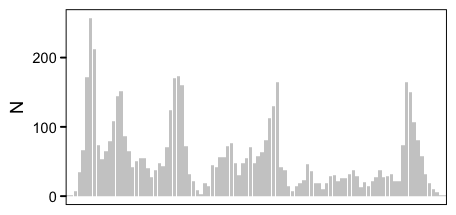

In [57]:
## beta ps bin 
options(repr.plot.width = 548.276/72/2, repr.plot.height = 258.924/72/2)
ps.bin.dat.sum <- fread('../dat/figdata/ps.bin.dat.sum.csv')

p <- ggplot(ps.bin.dat.sum %>% filter(celltype == "alpha") %>% droplevels(), aes(ps_bin, 
    N)) + geom_bar(stat = "identity", fill = "grey80") + theme_pubr() + theme(axis.title.x = element_blank()) + 
    scale_x_discrete(breaks = c(0, 50, 100))
print(p)
ggsave(p + theme(axis.title = element_blank(), axis.text = element_blank()), filename = "/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-05_figs/fig2D_alpha_ps_histogram.pdf", 
    width = 176/72, height = 36/72)

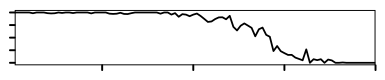

In [86]:
options(repr.plot.width = 154.196/72 * 1.5, repr.plot.height = 6/72 * 8)
pd <- ps.bin.dat.sum %>% filter(celltype == "alpha") %>% droplevels() %>% ungroup()%>%
    mutate(ps_bin.idx=as.numeric(factor(ps_bin,levels=ps_bin)))
#head(pd)
ggplot(pd) + geom_line(aes(ps_bin.idx, frac)) + theme_pubr()+coord_cartesian(expand = F)+
ylim(-0.05,1.05)+theme(text = element_blank())
ggsave(paste0("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/fig2D_alpha_ps_frac.pdf"),width=154.196/72 * 1.5,
     height=6/72 * 8,useDingbats = F)

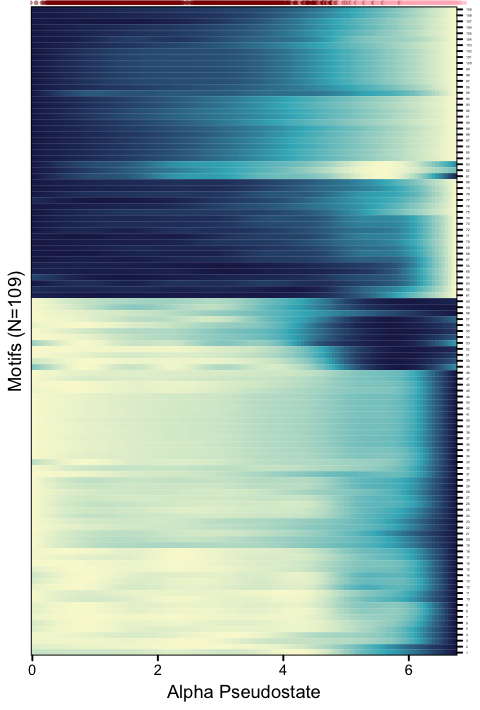

In [54]:
pd.fig_2.motif.alpha.pesudostate <- readRDS("../dat/figdata/fig_2.motif.alpha.pesudostate.hm.Rds")


pd <- pd.fig_2.motif.alpha.pesudostate$pd %>% as.data.frame() %>% rownames_to_column("motif") %>% 
    gather(key = "ps.idx", value = "zval", -1) %>% mutate(ps = (as.numeric(ps.idx) - 
    1) * 0.05, motif = factor(motif, levels = rev(rownames(pd.fig_2.motif.alpha.pesudostate$pd)))) %>% 
    select(-ps.idx)
l <- length(levels(pd$motif))

p1 <- ggplot(pd, aes(ps, as.numeric(motif))) + geom_tile(aes(fill = zval)) + theme_pubr() + 
    coord_cartesian(expand = F) + theme(axis.ticks.length = unit(1, "mm"), legend.position = "none", 
    axis.text.y  = element_text(size = 2), plot.margin = margin(0.5, 5, 5, 5, "pt")) + scale_fill_gradientn(colours = colorRampPalette(c(rgb(249, 
    249, 212, maxColorValue = 255), rgb(60, 181, 195, maxColorValue = 255), rgb(30, 
    35, 86, maxColorValue = 255)), space = "Lab")(50)) + scale_y_continuous(breaks = c(0, 
    l + 1), sec.axis = sec_axis(~., breaks = 1:l)) + ylab(paste0("Motifs (N=", l, 
    ")")) + xlab("Alpha Pseudostate")


p2 <- ggplot(pd.fig_2.motif.alpha.pesudostate$pd.anno, aes(pt, 1)) + geom_point(shape = 16, 
    size = 1, aes(color = subtype), alpha = 0.5) + 
    coord_cartesian(expand = F) + theme_void() +ylab("")+ theme(legend.position = "none", 
    plot.margin = margin(0.5, 8, 0, 5, "pt"), axis.title.y = element_text(size = 11, 
        vjust = 1, angle = 90, colour = "black", face = "plain", family = "Arial", 
         hjust = 0.5, lineheight = 0.5)) + scale_color_manual(values = c("darkred", 
    "lightpink"))


options(repr.plot.width = 4, repr.plot.height = 2.5/46*l)
ggarrange(p2, p1, nrow = 2, heights = c(1, l))

#ggsave( filename = '/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2B.motif_alpha_ps_idxlabel.pdf', width = 4, height = 2.5/46*l,
# useDingbats = F)
#fwrite(data.frame(idx=1:l,motif=levels(pd$motif)),'/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2B.motif_alpha_ps_idxlabel.csv')
#write.csv(pd.fig_2.motif.alpha.pesudostate$pd,"../dat/figdata/motif.alpha.ps.step0.05.csv")
#ggsave( filename = './fig_2B.motif_alpha_ps.pdf', width = 4, height = 2.5/46*l, useDingbats = F)


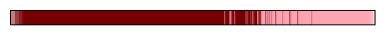

In [56]:
options(repr.plot.width = 154.196/72 * 1.5, repr.plot.height = 6/72 * 4)

ggplot(pd.fig_2.motif.alpha.pesudostate$pd.anno) + geom_rect(aes(xmin = pt - 0.1, 
    xmax = pt + 0.1, fill = subtype), ymin = 0, ymax = 1, alpha = 0.5) + theme_pubr() + 
    scale_fill_manual(values = c("darkred", "lightpink")) + coord_cartesian(expand = F) + 
    theme(legend.position = "none", axis.text.x = element_blank(), axis.ticks = element_blank())

ggsave(paste0("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/fig2D_alpha_ps_anno.pdf"),width=154.196/72 * 1.5,
     height=6/72 * 4,useDingbats = F)

In [1]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS  10.14.4

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] jsonlite_1.5 formatR_1.5 

loaded via a namespace (and not attached):
 [1] compiler_3.5.1  IRdisplay_0.7.0 pbdZMQ_0.3-3    tools_3.5.1    
 [5] htmltools_0.3.6 base64enc_0.1-3 crayon_1.3.4    Rcpp_0.12.19   
 [9] uuid_0.1-2      IRkernel_0.8.15 digest_0.6.18   repr_0.19.1    
[13] evaluate_0.12  